## Fit PDF


In [39]:
# load csv
import pandas as pd

df = pd.read_excel('../data/dataset.xlsx')

Summary                                                           14210
Issue key                                                         14210
Issue id                                                          14210
Issue Type                                                        14210
Status                                                            14210
Project key                                                       14210
Project name                                                      14210
Project type                                                      14210
Project lead                                                      14210
Project description                                                   0
Project url                                                       14210
Priority                                                          11662
Resolution                                                         6909
Assignee                                                        

In [40]:
df.count()

Summary                                                           14210
Issue key                                                         14210
Issue id                                                          14210
Issue Type                                                        14210
Status                                                            14210
Project key                                                       14210
Project name                                                      14210
Project type                                                      14210
Project lead                                                      14210
Project description                                                   0
Project url                                                       14210
Priority                                                          11662
Resolution                                                         6909
Assignee                                                        

In [15]:
df.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,...,Unnamed: 30,Custom field (Date of First Response),Custom field (Does fix include system behavior or UI changes?),Custom field (Feedback About),Custom field (Feedback Policy),Custom field (Last Touched By),Custom field (Last Update On),Custom field (Last commented),Custom field (Last commented by user?),Custom field (Symptom Severity)
0,Unable to start SourceTree after updating from...,SRCTREEWIN-13997,1929802,Bug,Short Term Backlog,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NaN,...,NaN,2023-05-25 06:00:37.226,No,Other,NaN,698877135425(JIRAUSER5932073),NaN,518400,True,Severity 1 - Critical
1,Unable to start SourceTree after updating from...,SRCTREEWIN-13997,1929802,Bug,Short Term Backlog,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NaN,...,NaN,2023-05-25 06:00:37.226,No,Other,NaN,698877135425(JIRAUSER5932073),NaN,518400,True,Severity 1 - Critical
2,Unable to start SourceTree after updating from...,SRCTREEWIN-13997,1929802,Bug,Short Term Backlog,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NaN,...,NaN,2023-05-25 06:00:37.226,No,Other,NaN,698877135425(JIRAUSER5932073),NaN,518400,True,Severity 1 - Critical
3,Unable to start SourceTree after updating from...,SRCTREEWIN-13997,1929802,Bug,Short Term Backlog,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NaN,...,NaN,2023-05-25 06:00:37.226,No,Other,NaN,698877135425(JIRAUSER5932073),NaN,518400,True,Severity 1 - Critical
4,Unable to start SourceTree after updating from...,SRCTREEWIN-13997,1929802,Bug,Short Term Backlog,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NaN,...,NaN,2023-05-25 06:00:37.226,No,Other,NaN,698877135425(JIRAUSER5932073),NaN,518400,True,Severity 1 - Critical


In [51]:
sanitized = df[df['Created'] < df['Updated']]
sanitized = sanitized[sanitized['Resolved'].notna()]
sanitized = sanitized[sanitized['Created'] < sanitized['Resolved']]
print(f"Before Duplicates: {sanitized['Issue id'].count()}")
# sanitized.drop_duplicates(subset=['Created', 'Resolved'], inplace=True)
print(f"After Duplicates: {sanitized['Issue id'].count()}")

Before Duplicates: 6909
After Duplicates: 6909


In [52]:
sanitized['Created'].describe()

count                             6909
mean     2020-08-15 15:48:23.829787392
min                2013-12-16 07:42:00
25%                2020-01-13 06:55:00
50%                2020-02-02 15:38:00
75%                2021-02-22 06:00:00
max                2023-02-22 08:43:00
Name: Created, dtype: object

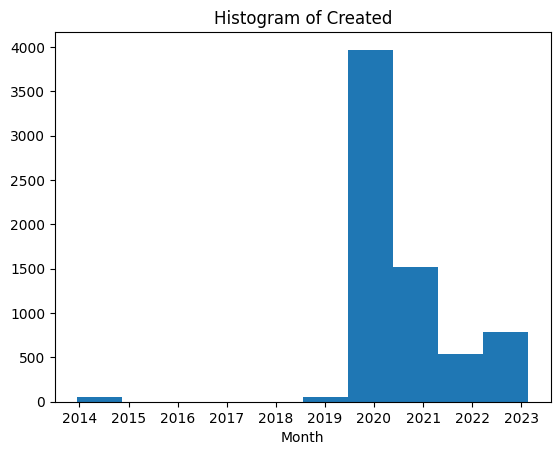

In [53]:
import matplotlib.pyplot as plt

plt.title('Histogram of Created')
plt.xlabel('Month')
plt.hist(sanitized['Created'])
plt.show()

In [54]:
from scipy.stats import zscore

sanitized['diff'] = (sanitized['Created'] - sanitized['Created'].min()).dt.days
sanitized['zscore'] = zscore(sanitized['diff'])
sanitized = sanitized[abs(sanitized['zscore']) < 3]

sanitized.describe()

,Issue id,Project description,Created,Updated,Last Viewed,Resolved,Fix Version/s,Due Date,Votes,ss,Unnamed: 30,Custom field (Date of First Response),Custom field (Last Update On),Custom field (Last commented),diff,zscore
count,6.860000e+03,0.0,6860,6860,6860,6860,490.000000,0.0,6860.000000,6860.000000,0.0,6713,0.0,6.860000e+03,6860.000000,6860.000000
mean,1.588660e+06,NaN,2020-09-02 01:07:18,2021-06-03 04:16:09.857142528,2023-05-31 08:15:00.043731712,2021-05-18 05:14:38.571428608,1574.000000,NaN,12.385714,55.642857,NaN,2020-11-20 19:52:41.316948992,NaN,6.470044e+07,2451.335714,0.043357
min,1.185767e+06,NaN,2019-06-06 10:50:00,2020-10-30 11:00:00,2023-05-31 07:54:00,2020-10-30 11:00:00,348.000000,NaN,1.000000,0.000000,NaN,2019-07-12 18:16:19.642000,NaN,1.728000e+05,1998.000000,-1.087219
25%,1.467035e+06,NaN,2020-01-13 07:31:00,2020-11-10 15:31:15,2023-05-31 08:04:00,2020-11-10 15:17:00,348.000000,NaN,1.000000,20.000000,NaN,2020-01-17 20:50:09.396999936,NaN,6.151680e+07,2218.750000,-0.536689
50%,1.478978e+06,NaN,2020-02-03 13:21:00,2021-01-22 10:31:00,2023-05-31 08:15:00,2021-01-15 10:49:30,348.500000,NaN,3.000000,30.000000,NaN,2020-11-17 10:58:31.337999872,NaN,7.473600e+07,2240.000000,-0.483694
75%,1.720497e+06,NaN,2021-02-22 12:31:30,2021-06-28 00:44:00,2023-05-31 08:26:00,2021-06-17 10:19:00,3413.000000,NaN,7.000000,60.000000,NaN,2021-03-04 19:37:46.632000,NaN,8.043840e+07,2624.500000,0.475213
max,1.918662e+06,NaN,2023-02-22 08:43:00,2023-05-30 07:44:00,2023-05-31 08:36:00,2023-05-29 07:29:00,3413.000000,NaN,513.000000,850.000000,NaN,2023-03-07 08:55:45.792000,NaN,1.148256e+08,3355.000000,2.297010
std,1.667076e+05,NaN,NaN,NaN,NaN,NaN,1502.867462,NaN,51.742895,93.297519,NaN,NaN,NaN,2.625376e+07,345.443923,0.861504


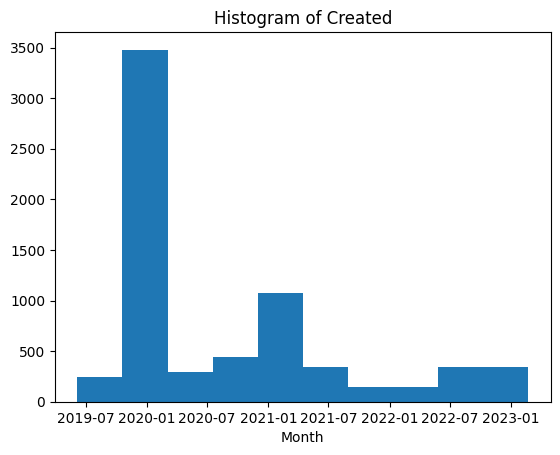

In [55]:
plt.title('Histogram of Created')
plt.xlabel('Month')
plt.hist(sanitized['Created'])
plt.show()

In [56]:
sanitized['service_time'] = sanitized['Resolved'] - sanitized['Created']
sanitized.describe()

,Issue id,Project description,Created,Updated,Last Viewed,Resolved,Fix Version/s,Due Date,Votes,ss,Unnamed: 30,Custom field (Date of First Response),Custom field (Last Update On),Custom field (Last commented),diff,zscore,service_time
count,6.860000e+03,0.0,6860,6860,6860,6860,490.000000,0.0,6860.000000,6860.000000,0.0,6713,0.0,6.860000e+03,6860.000000,6860.000000,6860
mean,1.588660e+06,NaN,2020-09-02 01:07:18,2021-06-03 04:16:09.857142528,2023-05-31 08:15:00.043731712,2021-05-18 05:14:38.571428608,1574.000000,NaN,12.385714,55.642857,NaN,2020-11-20 19:52:41.316948992,NaN,6.470044e+07,2451.335714,0.043357,258 days 04:07:20.571428572
min,1.185767e+06,NaN,2019-06-06 10:50:00,2020-10-30 11:00:00,2023-05-31 07:54:00,2020-10-30 11:00:00,348.000000,NaN,1.000000,0.000000,NaN,2019-07-12 18:16:19.642000,NaN,1.728000e+05,1998.000000,-1.087219,0 days 01:03:00
25%,1.467035e+06,NaN,2020-01-13 07:31:00,2020-11-10 15:31:15,2023-05-31 08:04:00,2020-11-10 15:17:00,348.000000,NaN,1.000000,20.000000,NaN,2020-01-17 20:50:09.396999936,NaN,6.151680e+07,2218.750000,-0.536689,114 days 01:26:15
50%,1.478978e+06,NaN,2020-02-03 13:21:00,2021-01-22 10:31:00,2023-05-31 08:15:00,2021-01-15 10:49:30,348.500000,NaN,3.000000,30.000000,NaN,2020-11-17 10:58:31.337999872,NaN,7.473600e+07,2240.000000,-0.483694,295 days 12:39:30
75%,1.720497e+06,NaN,2021-02-22 12:31:30,2021-06-28 00:44:00,2023-05-31 08:26:00,2021-06-17 10:19:00,3413.000000,NaN,7.000000,60.000000,NaN,2021-03-04 19:37:46.632000,NaN,8.043840e+07,2624.500000,0.475213,323 days 04:09:00
max,1.918662e+06,NaN,2023-02-22 08:43:00,2023-05-30 07:44:00,2023-05-31 08:36:00,2023-05-29 07:29:00,3413.000000,NaN,513.000000,850.000000,NaN,2023-03-07 08:55:45.792000,NaN,1.148256e+08,3355.000000,2.297010,1288 days 14:26:00
std,1.667076e+05,NaN,NaN,NaN,NaN,NaN,1502.867462,NaN,51.742895,93.297519,NaN,NaN,NaN,2.625376e+07,345.443923,0.861504,179 days 09:43:06.670084756


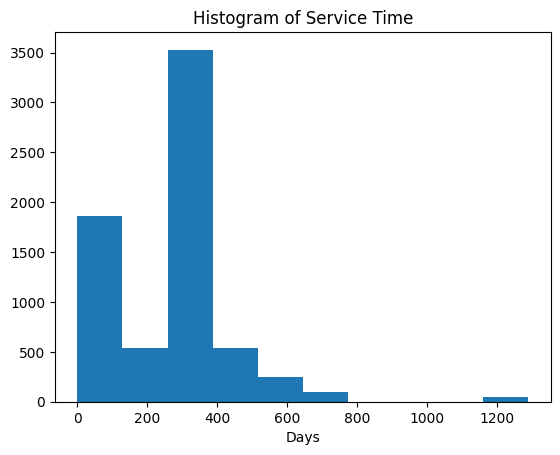

In [59]:
plt.title('Histogram of Service Time')
plt.xlabel('Days')
plt.hist(sanitized['service_time'].dt.days)
plt.show()

In [60]:
sanitized = sanitized[abs(zscore(sanitized['service_time'].dt.days)) < 3]

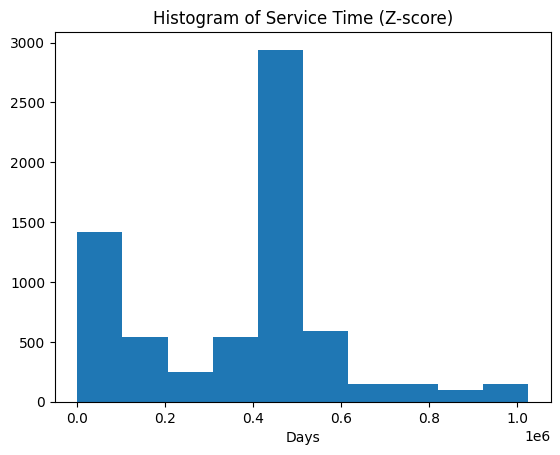

In [62]:
plt.title('Histogram of Service Time (Z-score)')
plt.xlabel('Days')
plt.hist(sanitized['service_time'].dt.days)
plt.show()

In [63]:
training_window = pd.DataFrame()

In [64]:
training_window['Created'] = sanitized['Created']
training_window['Resolved'] = sanitized['Resolved']
training_window['Priority'] = sanitized['Priority']
training_window['Service Time'] = sanitized['service_time']

In [68]:
training_window.sort_values(by='Created', inplace=True)
training_window['ia'] = training_window['Created'].diff().dt.total_seconds()

In [67]:
training_window['Created'].describe()

count                             6811
mean     2020-09-04 06:01:25.467625728
min                2019-06-06 10:50:00
25%                2020-01-13 07:43:00
50%                2020-02-04 11:04:00
75%                2021-02-23 08:06:00
max                2023-02-22 08:43:00
Name: Created, dtype: object

In [69]:
training_window['ia'] = training_window['ia'].fillna(0)
training_window['ia'] = training_window['ia'] / 60

In [70]:
training_window.head()

,Created,Resolved,Priority,Service Time,ia
14160,2019-06-06 10:50:00,2021-01-15 10:50:00,Medium,589 days,0.0
14131,2019-06-06 10:50:00,2021-01-15 10:50:00,Medium,589 days,0.0
14130,2019-06-06 10:50:00,2021-01-15 10:50:00,Medium,589 days,0.0
14129,2019-06-06 10:50:00,2021-01-15 10:50:00,Medium,589 days,0.0
14128,2019-06-06 10:50:00,2021-01-15 10:50:00,Medium,589 days,0.0


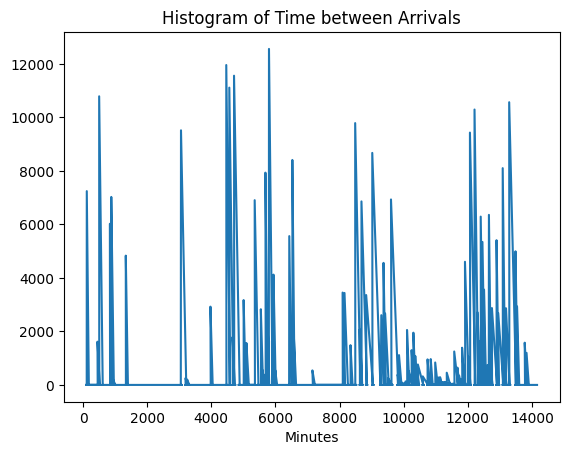

In [98]:
ia_outliers = training_window[abs(zscore(training_window['ia'])) < 3]

plt.title('Histogram of Time between Arrivals')
plt.xlabel('Minutes')
plt.plot(ia_outliers['ia'])
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halflogistic,0.000001,27190.178792,27203.821962,inf,0.984511,0.0
genexpon,0.000005,26881.373768,26915.481692,inf,0.984454,0.0
expon,0.000005,27302.647869,27316.291039,inf,0.984511,0.0
truncpareto,0.000005,27306.647139,27333.933478,inf,0.984511,0.0
pareto,0.000005,27304.647317,27325.112071,inf,0.984511,0.0


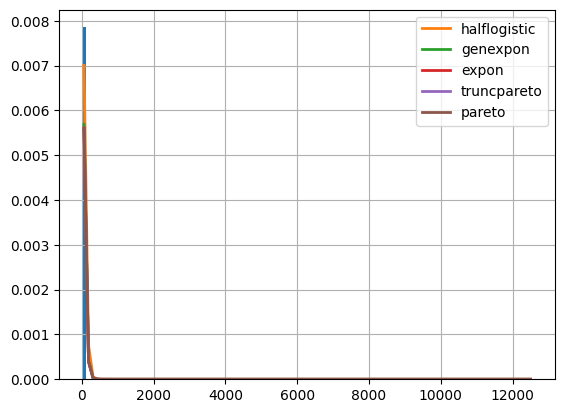

In [99]:
from fitter import Fitter

f = Fitter(ia_outliers['ia'])
f.fit()
# may take some time since by default, all distributions are tried,
# but you call manually provide a smaller set of distributions
f.summary()

In [75]:
best_params_ia = f.get_best()
print(best_params_ia)

{'halflogistic': {'loc': 0.0, 'scale': 47.291173845125044}}


In [102]:
from scipy import stats

ia = stats.halflogistic.rvs(**best_params_ia.get('halflogistic'), size=4_000)
gen = pd.DataFrame()
gen['ia'] = ia
gen['ia'].describe()

count    4000.000000
mean       62.977301
std        53.340208
min         0.011109
25%        22.801520
50%        49.550166
75%        88.906964
max       375.004986
Name: ia, dtype: float64

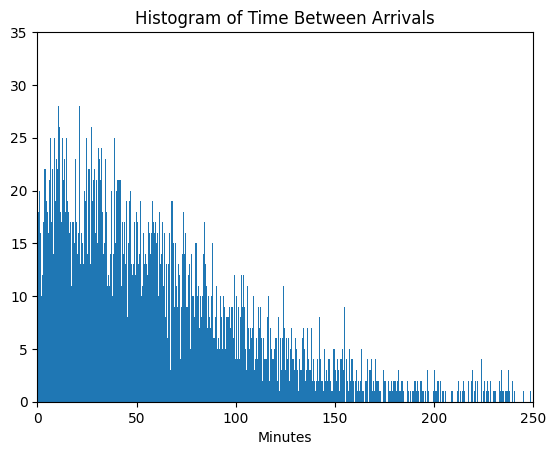

In [81]:
plt.title('Histogram of Time Between Arrivals')
plt.xlabel('Minutes')
plt.xlim(0, 250)
plt.ylim(0, 35)
plt.hist(gen['ta'], bins=1_000)
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
ncf,0.000016,1488.759085,1520.229333,inf,0.019956,0.081585
gengamma,0.000018,1511.985525,1537.161724,inf,0.011251,0.687453
exponweib,0.000018,1513.563241,1538.739440,inf,0.011073,0.706377
halflogistic,0.000020,1492.261834,1504.849934,inf,0.011565,0.654056
burr,0.000021,1477.483680,1502.659878,inf,0.020879,0.060309


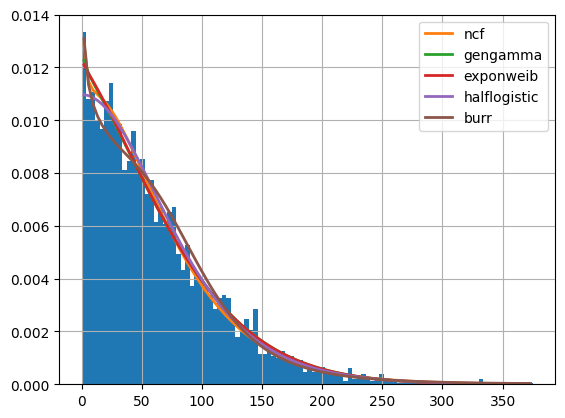

In [103]:
f = Fitter(gen['ia'])
f.fit()
# may take some time since by default, all distributions are tried,
# but you call manually provide a smaller set of distributions
f.summary()

In [104]:
ia_outliers = training_window[abs(zscore(training_window['Service Time'].dt.days)) < 3]

In [107]:
ia_outliers['Priority'].value_counts()

Priority
Low        6076
High        294
Highest     245
Medium       98
Name: count, dtype: int64

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
jf_skew_t,0.001080,1625.827438,1642.986300,inf,0.153971,1.266388e-11
nct,0.001080,1626.955081,1644.113943,inf,0.156135,6.088701e-12
invgamma,0.001080,1621.051903,1633.921050,inf,0.152589,2.010800e-11
invgauss,0.001084,1597.092723,1609.961870,inf,0.150093,4.585584e-11
norminvgauss,0.001084,1599.304046,1616.462909,inf,0.150422,4.116651e-11


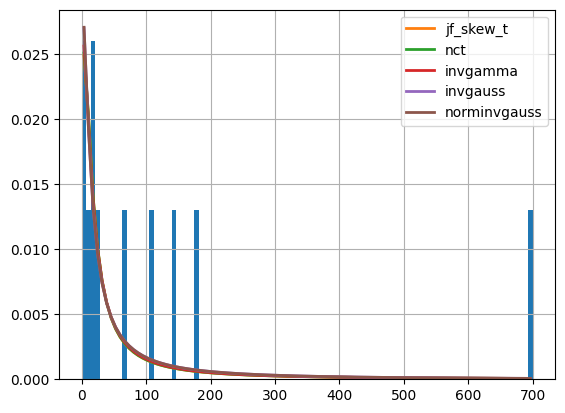

In [110]:
f = Fitter(ia_outliers[ia_outliers['Priority'].isin(['Highest', 'High'])]['Service Time'].dt.days)
f.fit()
# may take some time since by default, all distributions are tried,
# but you call manually provide a smaller set of distributions
f.summary()

In [93]:
best_params_ta = f.get_best()
print(best_params_ta)

{'gennorm': {'beta': 0.35001800492775303, 'loc': 300.0, 'scale': 3.071132572061014}}


In [94]:
gen = pd.DataFrame()
ta = stats.gennorm.rvs(**best_params_ta.get('gennorm'), size=4_000)
gen['ta'] = ta
gen['ta'].describe()

count    4000.000000
mean      287.889229
std       293.848408
min     -6066.162971
25%       254.210646
50%       299.200550
75%       336.260621
max      4156.224640
Name: ta, dtype: float64

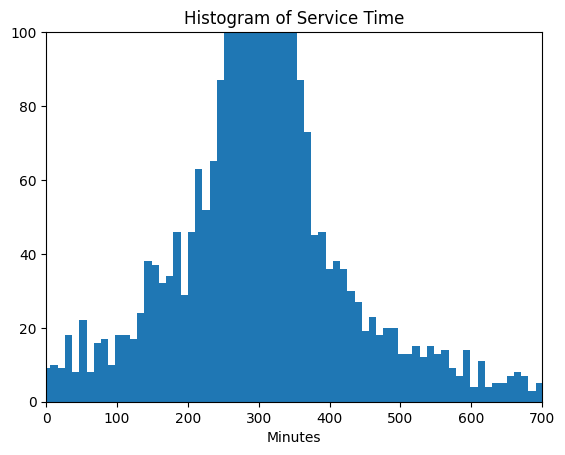

In [97]:
plt.title('Histogram of Service Time')
plt.xlabel('Minutes')
plt.xlim(0, 700)
plt.ylim(0, 100)
plt.hist(gen['ta'], bins=1_000)
plt.show()